# Install Required Libraries

In [1]:
!pip install textblob requests beautifulsoup4
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\jomol\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jomol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jomol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jomol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\jomol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\jomol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [4]:
import pandas as pd
from textblob import TextBlob

# Sample headlines
headlines = [
    "The economy is improving faster than expected.",
    "The new product launch was a complete disaster.",
    "I love using this new AI tool for productivity!",
    "There are concerns about inflation rising.",
    "The team performed exceptionally well today."
]

# Create DataFrame
df = pd.DataFrame(headlines, columns=["text"])

# Sentiment Analysis
df["polarity"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment"] = df["polarity"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

# Save to CSV
df.to_csv("scrapedData.csv", index=False)

# Preview
df.head()


,text,polarity,sentiment
0,The economy is improving faster than expected.,-0.100000,Negative
1,The new product launch was a complete disaster.,0.118182,Positive
2,I love using this new AI tool for productivity!,0.335227,Positive
3,There are concerns about inflation rising.,0.000000,Neutral
4,The team performed exceptionally well today.,0.666667,Positive


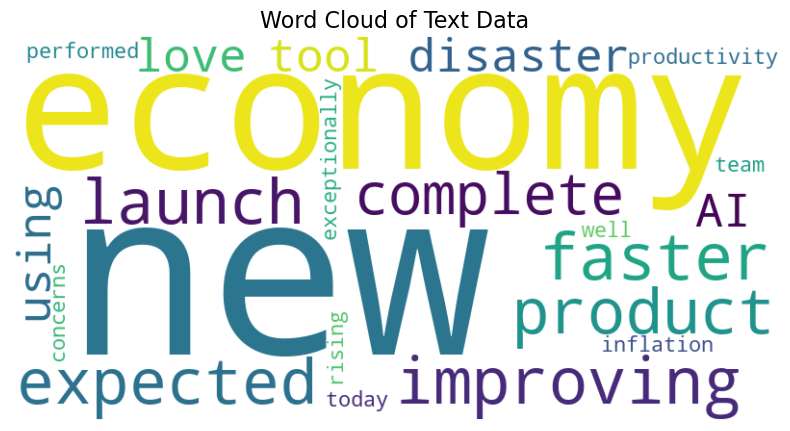

In [6]:
# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text entries into one string
all_text = " ".join(df["text"])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Data", fontsize=16)
plt.show()